In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt






In [2]:
# Load the data
url = '/Users/javi/Desktop/Ironhack/Entregas_de_github/Final-Project-at-Ironhack/Data/Cleaned/World_machine_learning_ready.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataframe to understand its structure
data.head()


,World_Tertiary Enrolment (F),World_Tertiary Enrolment (M),World_Secondary Enrolment (M),World_Secondary Enrolment (F),World_Primary Enrolment (F),World_Primary Enrolment (M),World_Birth Rate,World_Death Rate,World_GDP per Capita,World_Natural Growth Rate,World_Median Age,World_Total Population
0,10.23,14.18,47.95,38.93,75.82,81.60,3.73,10.35,2587.77,1.79,21.5,4.442348e+09
1,10.64,14.25,52.65,45.37,75.46,82.38,3.71,10.20,2621.86,1.81,21.6,4.520917e+09
2,11.06,14.31,57.35,51.81,75.10,83.16,3.72,10.12,2538.52,1.84,21.7,4.602701e+09
3,11.47,14.37,62.05,58.25,74.74,83.94,3.59,10.17,2561.57,1.77,21.8,4.684876e+09
4,11.88,14.43,66.75,64.69,74.38,84.72,3.57,10.04,2614.18,1.78,21.9,4.766641e+09


In [3]:
# Preparing the data for linear regression
# Extracting the year and total population columns
data['Year'] = range(1980, 1980 + len(data))
X = data[['Year']].values
y = data['World_Total Population'].values

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

# Predicting the next 5 years
future_years = np.array([[year] for year in range(2022, 2027)])
future_years_scaled = scaler.transform(future_years)
future_predictions = model.predict(future_years_scaled)

# Creating a DataFrame for the predictions
future_data = pd.DataFrame({
    'Year': range(2022, 2027),
    'Predicted_World_Total_Population': future_predictions
})

future_data


,Year,Predicted_World_Total_Population
0,2022,7.993348e+09
1,2023,8.077878e+09
2,2024,8.162408e+09
3,2025,8.246938e+09
4,2026,8.331469e+09


In [20]:
# Predicting further into the future to find when the population starts to decline
future_years_extended = np.array([[year] for year in range(2022, 2070)])  # Extending prediction to 2100
future_years_extended_scaled = scaler.transform(future_years_extended)
future_predictions_extended = model.predict(future_years_extended_scaled)

# Finding the first year when the population starts to decline
decline_year = None
for i in range(1, len(future_predictions_extended)):
    if future_predictions_extended[i] < future_predictions_extended[i - 1]:
        decline_year = future_years_extended[i, 0]
        break

decline_year


/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


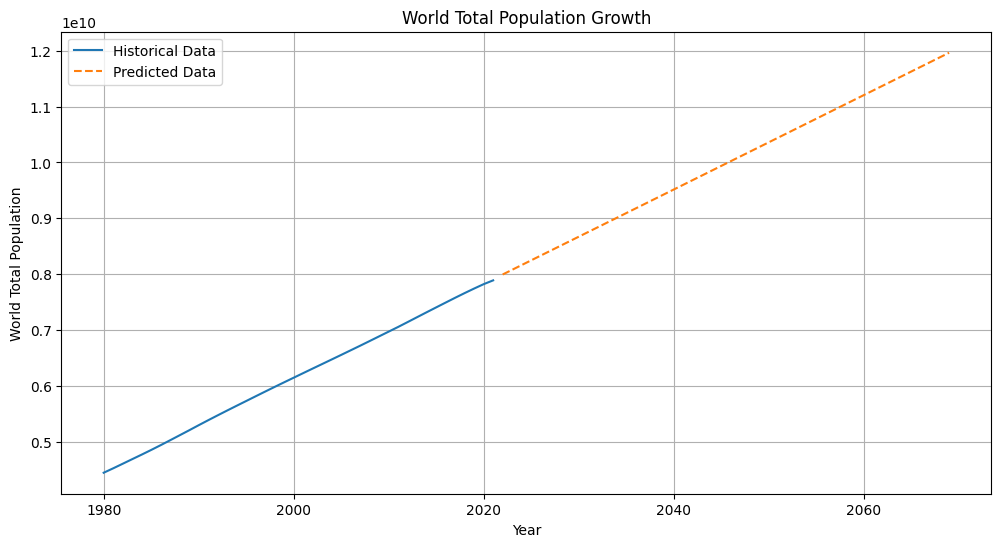

In [21]:
# Plotting the population growth
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Total Population'], label='Historical Data')
plt.plot(future_years_extended, future_predictions_extended, label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Total Population')
plt.title('World Total Population Growth')
plt.legend()
plt.grid(True)
plt.show()


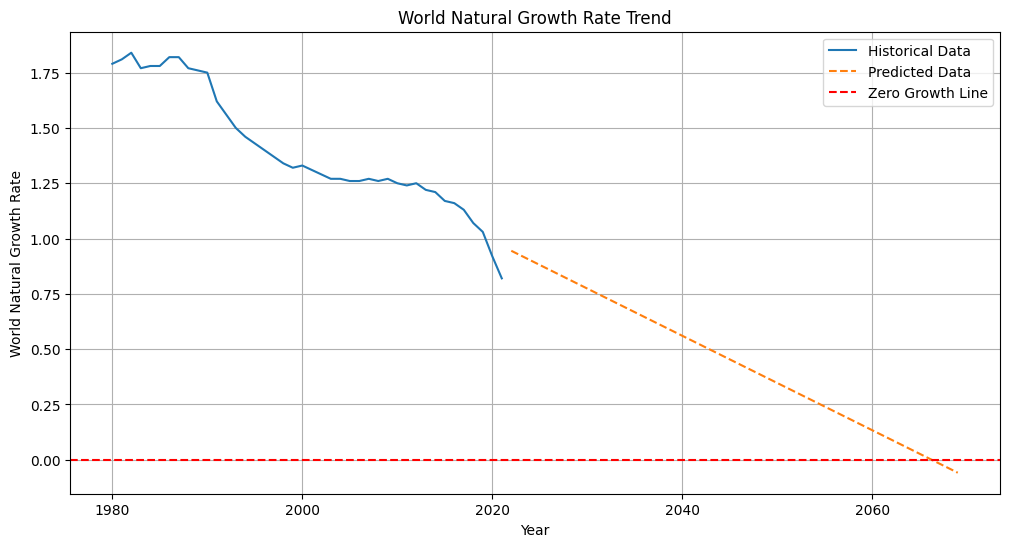

2067

In [22]:
# Extracting the year and world natural growth rate columns
X_growth_rate = data[['Year']].values
y_growth_rate = data['World_Natural Growth Rate'].values

# Scaling the features for the growth rate
scaler_growth_rate = StandardScaler()
X_growth_rate_scaled = scaler_growth_rate.fit_transform(X_growth_rate)

# Fitting the linear regression model for the growth rate
model_growth_rate = LinearRegression()
model_growth_rate.fit(X_growth_rate_scaled, y_growth_rate)

# Predicting the growth rate for the future years
future_growth_rate_predictions = model_growth_rate.predict(future_years_extended_scaled)

# Finding the first year when the growth rate becomes negative
negative_growth_year = None
for i in range(len(future_growth_rate_predictions)):
    if future_growth_rate_predictions[i] < 0:
        negative_growth_year = future_years_extended[i, 0]
        break

# Plotting the natural growth rate
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Natural Growth Rate'], label='Historical Data')
plt.plot(future_years_extended, future_growth_rate_predictions, label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Natural Growth Rate')
plt.title('World Natural Growth Rate Trend')
plt.axhline(0, color='red', linestyle='--', label='Zero Growth Line')
plt.legend()
plt.grid(True)
plt.show()

negative_growth_year


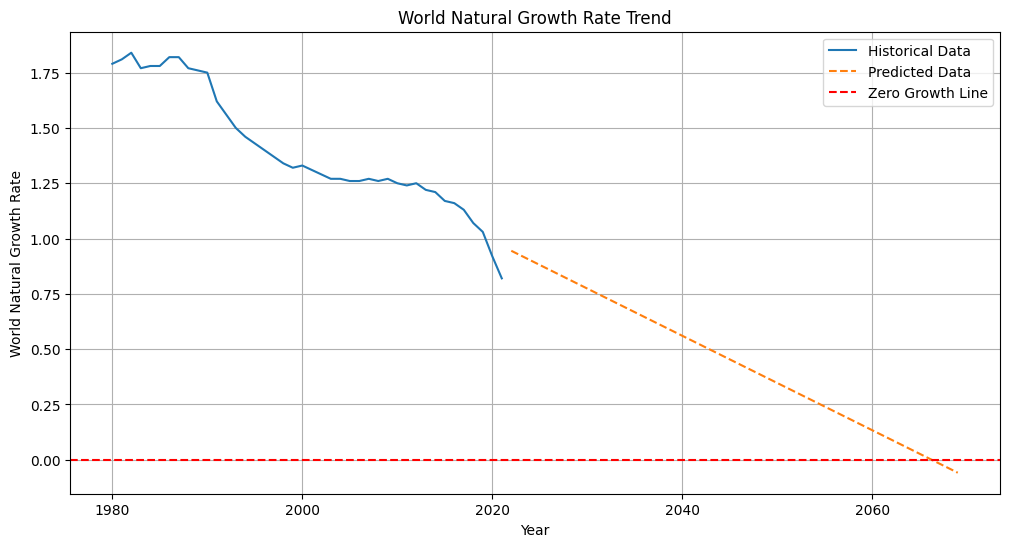

2067

In [23]:
# Extracting the year and world natural growth rate columns
X_growth_rate = data[['Year']].values
y_growth_rate = data['World_Natural Growth Rate'].values

# Scaling the features for the growth rate
scaler_growth_rate = StandardScaler()
X_growth_rate_scaled = scaler_growth_rate.fit_transform(X_growth_rate)

# Fitting the linear regression model for the growth rate
model_growth_rate = LinearRegression()
model_growth_rate.fit(X_growth_rate_scaled, y_growth_rate)

# Predicting the growth rate for the future years
future_growth_rate_predictions = model_growth_rate.predict(future_years_extended_scaled)

# Finding the first year when the growth rate becomes negative
negative_growth_year = None
for i in range(len(future_growth_rate_predictions)):
    if future_growth_rate_predictions[i] < 0:
        negative_growth_year = future_years_extended[i, 0]
        break

# Plotting the natural growth rate
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Natural Growth Rate'], label='Historical Data')
plt.plot(future_years_extended, future_growth_rate_predictions, label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Natural Growth Rate')
plt.title('World Natural Growth Rate Trend')
plt.axhline(0, color='red', linestyle='--', label='Zero Growth Line')
plt.legend()
plt.grid(True)
plt.show()

negative_growth_year


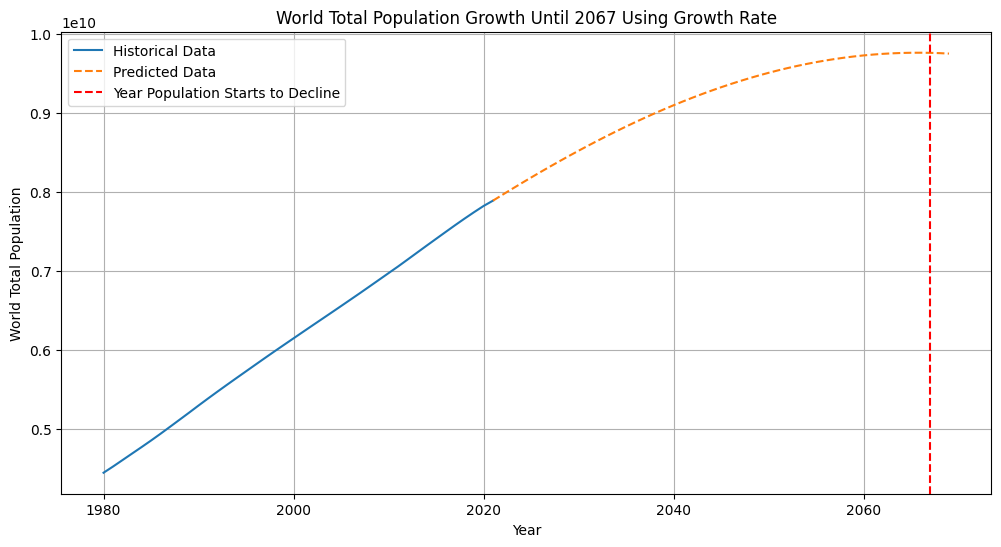

9759807929.140722

In [24]:
# Using the growth rate to calculate future population
future_population = [data['World_Total Population'].values[-1]]
future_growth_rates = model_growth_rate.predict(future_years_extended_scaled)

for rate in future_growth_rates:
    next_population = future_population[-1] * (1 + rate / 100)
    future_population.append(next_population)

# Creating a DataFrame for the population predictions using the growth rate
population_predictions_with_growth_rate = pd.DataFrame({
    'Year': range(2021, 2070),
    'Predicted_World_Total_Population': future_population
})

# Plotting the total population using the growth rate until 2067
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Total Population'], label='Historical Data')
plt.plot(population_predictions_with_growth_rate['Year'], population_predictions_with_growth_rate['Predicted_World_Total_Population'], label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Total Population')
plt.title('World Total Population Growth Until 2067 Using Growth Rate')
plt.axvline(2067, color='red', linestyle='--', label='Year Population Starts to Decline')
plt.legend()
plt.grid(True)
plt.show()

# Population in 2067 using the growth rate method
population_2067_growth_rate = population_predictions_with_growth_rate.loc[population_predictions_with_growth_rate['Year'] == 2067, 'Predicted_World_Total_Population'].values[0]
population_2067_growth_rate


The first year when the population starts to decline: None


/Users/javi/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


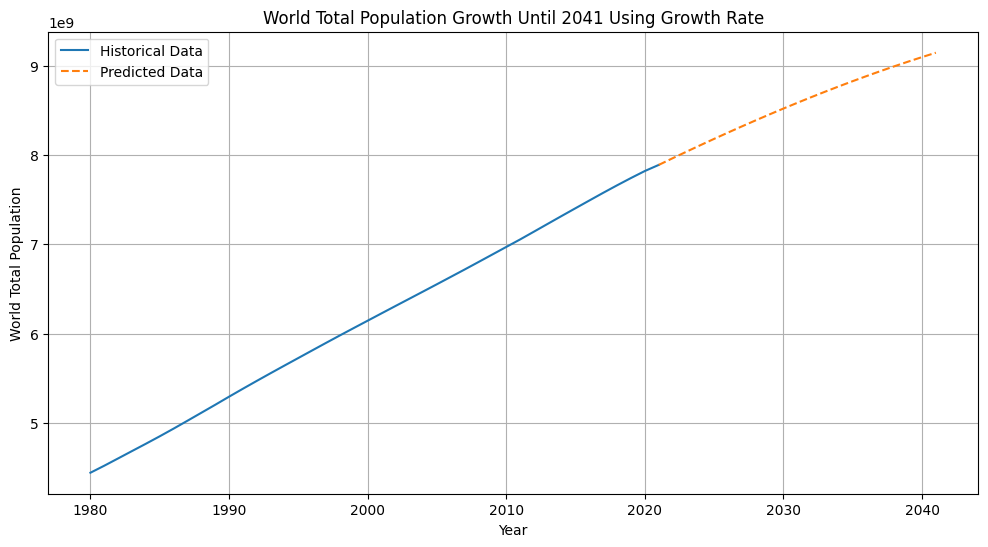

Predicted World Total Population in 2041: 9144736026.5658


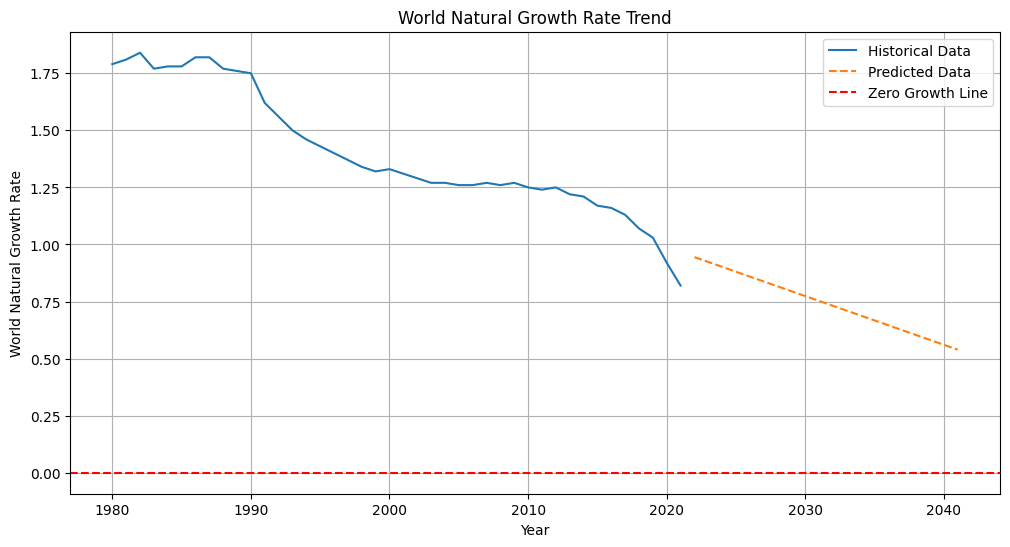

In [19]:
# Extending prediction to 2041
future_years_extended = np.array([[year] for year in range(2022, 2042)])  # Include 2041
scaler = StandardScaler()

# Fit the scaler on historical years
scaler.fit(data[['Year']])

# Transform future years
future_years_extended_scaled = scaler.transform(future_years_extended)

# Model for predicting future population (assuming the model is already trained)
# Predict future population
future_predictions_extended = model.predict(future_years_extended_scaled)

# Finding the first year when the population starts to decline
decline_year = None
for i in range(1, len(future_predictions_extended)):
    if future_predictions_extended[i] < future_predictions_extended[i - 1]:
        decline_year = future_years_extended[i, 0]
        break

print(f"The first year when the population starts to decline: {decline_year}")

# Model for predicting future growth rate (assuming the model_growth_rate is already trained)
# Predicting the growth rate for the future years
future_growth_rate_predictions = model_growth_rate.predict(future_years_extended_scaled)

# Using the growth rate to calculate future population
future_population = [data['World_Total Population'].values[-1]]
for rate in future_growth_rate_predictions:
    next_population = future_population[-1] * (1 + rate / 100)
    future_population.append(next_population)

# Creating a DataFrame for the population predictions using the growth rate
population_predictions_with_growth_rate = pd.DataFrame({
    'Year': range(2021, 2042),  # Adjust to include 2041
    'Predicted_World_Total_Population': future_population
})

# Plotting the total population using the growth rate until 2041
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Total Population'], label='Historical Data')
plt.plot(population_predictions_with_growth_rate['Year'], population_predictions_with_growth_rate['Predicted_World_Total_Population'], label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Total Population')
plt.title('World Total Population Growth Until 2041 Using Growth Rate')
plt.legend()
plt.grid(True)
plt.show()

# Population in 2041 using the growth rate method
population_2041_growth_rate = population_predictions_with_growth_rate.loc[population_predictions_with_growth_rate['Year'] == 2041, 'Predicted_World_Total_Population'].values[0]
print(f"Predicted World Total Population in 2041: {population_2041_growth_rate}")

# Finding the first year when the growth rate becomes negative
negative_growth_year = None
for i in range(len(future_growth_rate_predictions)):
    if future_growth_rate_predictions[i] < 0:
        negative_growth_year = future_years_extended[i, 0]
        break


# Plotting the natural growth rate
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['World_Natural Growth Rate'], label='Historical Data')
plt.plot(future_years_extended, future_growth_rate_predictions, label='Predicted Data', linestyle='--')
plt.xlabel('Year')
plt.ylabel('World Natural Growth Rate')
plt.title('World Natural Growth Rate Trend')
plt.axhline(0, color='red', linestyle='--', label='Zero Growth Line')
plt.legend()
plt.grid(True)
plt.show()
